# Probleme de clasificare <img src="images/binClassification.png" width="150">


## Obiective
* rezolvarea unei probleme de clasificare binara
* rezolvarea unei probleme de clasificare multi-clasa redusa la mai multe probleme de clasificare bianra (*one vs. all*)
* folosirea unor algoritmi liniari de regresie logistica (folosirea functie $sigmoid$)
* normalizarea datelor (atributelor datelor)

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* etichete ale datelor
* normalizare date 
* model de clasificare liniar
* acuratetea, precizia si rapelul clasificarii

## Aspecte teoretice

Problemele de clasificare sunt asemanatoare celor de regresie (pe baza unor caracteristici a datelor se doreste prezicearea unor valori asociate acestor date), doar ca $outputurile$ sunt de tip discrete (etichete ale calselor din care face parte fiecare data de intrare).

### Exemple de probleme de clasificare:
* etichetarea unui mesaj ca $spam$ sau $normal$ (clasificare binara)
* etichetarea unei tumori ca $benigna$ sau $maligna$ (clasificare binara)
* etichetarea unei fete ca $vesela$, $trista$ sau $furioasa$ (clasificare multi-clasa)



<details>
  <summary>Remember the theory behind binary classification </summary>
 

### Formalizare problema de clasificare binara:

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_3)$) si $eticheta$ ($label \in \{0, 1\}$)
* modelul (liniar) de discriminare intre cele 2 clase: $y = f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$ (atentie, $y$ va fi un numar real, nu o eticheta)
* clasificatorul, adica modelul de predictie (asociaza o eticheta valorii reale calculata cu modelul de discriminare): $label = h(x, w) = transformare(f(x, w))$


### Metodologia rezolvarii unei probleme de clasificare binara

**Antrenare** 


> Input: 

un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., n\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi 0 sau 1 - clasificare binara), $n$ reprezinta numarul de date de antrenament.


> Output: 

un model de discriminare intre cele 2 clase, adica valorile optime ale coeficientilor $w$ din ecuatia de regresie 
$$f(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ... $$


> Algoritm: 

Regresie logistica - identificarea coeficientilor prin $Gradient Descent$
in care valoarea prezisa de discriminator este transformata in $[0, 1]$ 
$$y_{computed} = sigmoid(f(x,w))$$

**Testare** 

> Input: 

un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: 

eticheta prezisa pentru exemplul $x_{new}$

> Algoritm: 

Folosirea discriminantului invatat (a coeficientilor), a transformatei de tip sigmoid si a unui prag ($\Theta$): 
$$label = \left\{\begin{array}{lr}    0, & sigmoid(f(x_{new}, w)) < \Theta\\    1, & altfel \end{array} \right.$$

### Evaluarea performantei clasificatorului (a se vedea materialele din laboratorul 6)

* acuratetea 
* precizia
* rapelul 

</details>

<details>
  <summary>Remember the theory behind multi-class classification </summary>
 

### Formalizare problema de clasificare multiclasa - abordarea *one versus all*: <img src="images\multiclass.png" width="200">

**One vs. all** provides a way to leverage binary classification. Given a classification problem with $noClasses$ possible solutions, a *one-vs.-all* solution consists of $noClasses$ separate binary classifiers—one binary classifier for each possible outcome. During training, the model runs through a sequence of binary classifiers, training each to answer a separate classification question. For example, given five possible classes (apple, bear, candy, dog, egg) and a picture of a dog, five different recognizers might be trained, four seeing the image as a negative example (not a dog) and one seeing the image as a positive example (a dog). That is:
* Is this image an apple? No.
* Is this image a bear? No.
* Is this image candy? No.
* Is this image a dog? Yes.
* Is this image an egg? No.

This approach is fairly reasonable when the total number of classes is small, but becomes increasingly inefficient as the number of classes rises.

* datele se caracterizeaza prin $atribute$ ($x = (x_1, x_2, ..., x_m)$) si $eticheta$ ($label \in \{1, 2, 3, ..., noClasses\}$)
* se transforma problema in $noClasses$ probleme de clasificare binara
    - de ex., prima problema va fi formata din exemplele din clasa cu eticheta 1 si toate celelalte exemplele (1 versus restul)
    - a doua problema va fi formata din exemplele din clasa cu eticheta 2 si toate celelalte exemplele (2 versus restul)
* se antreneaza $noClasses$ modele de discriminare binara 
* la testare, se aplica toate modelele binare si este ales cel care produce cea mai mare valoare (indicele modelului va indica eticheta prezisa)



### Metodologia one vs. all pentru rezolvarea unei probleme de clasificare multi-clasa

**Antrenare** 

> Input: 

un set de exemple etichetate $(x^i, y^i)$, cu $i \in \{1, 2, ..., n\}$, $x^i$ - vectorul de atribute asociate unui exemplu, $y^i$ etichetata asociata exemplului $x^i$ (poate fi  1, 2, ..., $noClasses$ - clasificare multi-clasa)

> Output: 

$noClasses$ modele de discriminare intre 2 cate 2 clase (adica valorile optime ale coeficientilor $w$ din ecuatiile de regresie $f^k(x, w) = w_0 + w_1 * x_1 + w_2 * x_2 + ...$, unde $k = 1, 2, ..., noClasses$

> Algoritm: 

Identificarea coeficientilor (din fiecare problema binara) prin:
* metoda celor mai mici patrate ($Least Square$)
* $Gradient Descent$
in care valoarea prezisa de discriminator este transformata in $[0, 1]$ ($y_{computed} = sigmoid(f(x,w))$).

**Testare** 

> Input: 

un exemplu ne-etichetat $(x_{new})$, cu $x_{new}$ - vectorul de atribute asociate acelui exemplu

> Output: 

eticheta prezisa pentru exemplul $x_{new}$

> Algoritm:
* calcularea valorilor prezise de fiecare discriminant si sigmoidarea lor (similar clasificarii binare) 
$$computed = [sigmoid(f^1(x_{new},w^1)), sigmoid(f^(x_{new}, w^2)), ..., sigmoid(f^{noClasses}(x_{new}, w^{noClasses}))]$$
* identificarea celei mai mari valori din $computed$ 
* pozitia valorii maximale indica eticheta corecta asociata lui $x_{new}$
$$label = argmax(computed)$$


### Evaluarea performantei clasificatorului (a se vedea materialele din laboratorul 6)

* acuratetea 
* precizia
* rapelul 

</details>

## Exemple

### Demo1 - clasificare binara <img src="images/breast.png" width="150">

#### Problema: clasificarea țesuturilor cancerigene

Se consideră informații despre cancerul de sân la femei, informații extrase din ecografii mamare (detalii [aici](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))) precum:
* Tipul malformației identificate (țesut benign sau țesut malign)
* Caracteristici numerice ale nucleului celulelor din aceste țesuturi: 
    - raza (media distanțelor între centru si punctele de pe contur)
    - textura (măsurată prin deviația standard a nivelelor de gri din imaginea asociată țesutului analizat)

Folosindu-se aceste date, să se decidă dacă țesutul dintr-o nouă ecografie (pentru care se cunosc cele 2 caracteristici numerice – raza și textura –) va fi etichetat ca fiind malign sau benign. 

**Metodologie pentru aplicarea RL pentru estimarea tipului de cancer**

*	step1: load data (breast cancer & 2 features), plot pt distributia datelor
*	step2: impartire pe train si test; normalizare 
*	step3: invatare model (cu tool linear_model.LogisticRegression() -- [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) -- sau cu implementare proprie)
*	step4: testare model, plot rezultate, forma outputului si interpretarea lui
*	step5: calcul metrici de performanta (acc)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


#### Pasul 1 - plot pt distributia datelor 

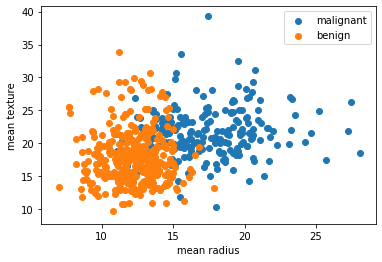

In [5]:
# step1: load data (breast cancer & 2 features), plot pt distributia datelor

data = load_breast_cancer()
inputs = data['data']
outputs = data['target']
outputNames = data['target_names']
featureNames = list(data['feature_names'])
feature1 = [feat[featureNames.index('mean radius')] for feat in inputs]
feature2 = [feat[featureNames.index('mean texture')] for feat in inputs]
inputs = [[feat[featureNames.index('mean radius')], feat[featureNames.index('mean texture')]] for feat in inputs]

import matplotlib.pyplot as plt
labels = set(outputs)
noData = len(inputs)
for crtLabel in labels:
    x = [feature1[i] for i in range(noData) if outputs[i] == crtLabel ]
    y = [feature2[i] for i in range(noData) if outputs[i] == crtLabel ]
    plt.scatter(x, y, label = outputNames[crtLabel])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()    

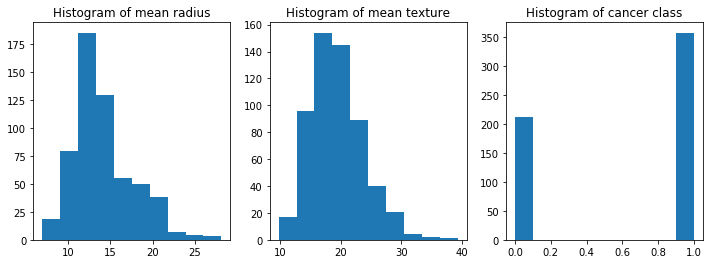

In [7]:
fig, ax = plt.subplots(1, 3,  figsize=(4 * 3, 4))
ax[0].hist(feature1, 10)
ax[0].title.set_text('Histogram of mean radius')
ax[1].hist(feature2, 10)
ax[1].title.set_text('Histogram of mean texture')
ax[2].hist(outputs, 10)
ax[2].title.set_text('Histogram of cancer class')
plt.show()

#### Pasul 2 - impartire date pe train si test si normalizare

In [ ]:
def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData


In [ ]:
def plotClassificationData(feature1, feature2, outputs, title = None):
    labels = set(outputs)
    noData = len(feature1)
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if outputs[i] == crtLabel ]
        y = [feature2[i] for i in range(noData) if outputs[i] == crtLabel ]
        plt.scatter(x, y, label = outputNames[crtLabel])
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend()
    plt.title(title)
    plt.show()


In [ ]:
# step2: impartire pe train si test
# step2': normalizare 
import numpy as np

# split data into train and test subsets
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

#normalise the features
trainInputs, testInputs = normalisation(trainInputs, testInputs)

#plot the normalised data
feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]
feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]  

plotClassificationData(feature1train, feature2train, trainOutputs, 'normalised train data')


#### Pasul 3 - invatare model (cu tool sau cod propriu)

In [ ]:
# step3: invatare model (cu tool linear_model.LogisticRegression() -- [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) -- si cu implementare proprie)


#identify (by training) the classifier

# # using sklearn
# from sklearn import linear_model
# classifier = linear_model.LogisticRegression()

# using developed code
from LogisticRegression import MyLogisticRegression 
# model initialisation
classifier = MyLogisticRegression()

# train the classifier (fit in on the training data)
classifier.fit(trainInputs, trainOutputs)
# parameters of the liniar regressor
w0, w1, w2 = classifier.intercept_, classifier.coef_[0], classifier.coef_[1]
print('classification model: y(feat1, feat2) = ', w0, ' + ', w1, ' * feat1 + ', w2, ' * feat2')
    

#### Pasul 4 - plot rezultate (model invatat, predictii)

In [ ]:
# step4: testare model, plot rezultate, forma outputului si interpretarea lui

# makes predictions for test data
# computedTestOutputs = [w0 + w1 * el[0] + w2 * el[1] for el in testInputs]

# makes predictions for test data (by tool)
computedTestOutputs = classifier.predict(testInputs)


In [ ]:

def plotPredictions(feature1, feature2, realOutputs, computedOutputs, title, labelNames):
    labels = list(set(outputs))
    noData = len(feature1)
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] == crtLabel]
        plt.scatter(x, y, label = labelNames[crtLabel] + ' (correct)')
    for crtLabel in labels:
        x = [feature1[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel ]
        y = [feature2[i] for i in range(noData) if realOutputs[i] == crtLabel and computedOutputs[i] != crtLabel]
        plt.scatter(x, y, label = labelNames[crtLabel] + ' (incorrect)')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.legend()
    plt.title(title)
    plt.show()

plotPredictions(feature1test, feature2test, testOutputs, computedTestOutputs, "real test data", outputNames)

#### Pasul 5 - calcul metrici de performanta (eroarea)

In [ ]:
# step5: calcul metrici de performanta (acc)

# evalaute the classifier performance
# compute the differences between the predictions and real outputs
# print("acc score: ", classifier.score(testInputs, testOutputs))
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    if (t1 != t2):
        error += 1
error = error / len(testOutputs)
print("classification error (manual): ", error)

from sklearn.metrics import accuracy_score
error = 1 - accuracy_score(testOutputs, computedTestOutputs)
print("classification error (tool): ", error)

## Tema –  Ce fel de floare preferi? (clasificare multiclasa) <img src="images/iris.png" width="350">

**Ce floare de iris alegi?**
Se consideră problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi [aici](https://archive.ics.uci.edu/ml/datasets/Iris). 
Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare. 


Să se rezolve problema implementându-se rutine pentru:
* clasificarea multi-clasă folosind metoda de regresie logistică (cu tool)
* clasificarea multi-clasă folosind metoda de regresie logistică (cu cod propriu) prin adaptarea flow-ului de la clasificarea binara (transformarea problemei cu k clase in k probleme binare – one versus all; atentie la outputul oferit de tool si cum fac predictiile pe validare/test)

## Tema optionala

Să se rezolve problema clasificarii florilor de iris implementându-se rutine pentru:
- folosirea batch-urilor în procesul de antrenament și validarea încrucișată
- investigarea diferitelor funcții de loss (temă opțională). 

Ce se întîmplă în cazul clasificarii binare daca se modifică pragul de decizie din 0.5 în alte valori. Cum se poate aprecia calitatea clasificatorului pentru diferite valori ale pragului?
